Descriptive Statistics

In [47]:

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

data_5km = pd.read_csv("data/5km/experiment-2/SocialDynamics Dry weather group runners vs solo runners and spectators (5km)-table.csv", skiprows=6)

data_10km = pd.read_csv("data/10km/experiment-2/SocialDynamics Dry weather group runners vs solo runners and spectators (10km)-table.csv", skiprows=6)

data_21km = pd.read_csv("data/21km/experiment-2/SocialDynamics Dry weather group runners vs solo runners and spectators (21km)-table.csv", skiprows=6)

data_42_2km = pd.read_csv("data/42.2km/experiment-2/SocialDynamics Dry weather group runners vs solo runners and spectators (42.2km)-table.csv", skiprows=6)

#data_10km
#print(data[['avg-group-runners-speed', 'avg-solo-runner-speed', 'avg-group-runners-finish-time', 'avg-solo-runner-finish-time']].describe())


In [48]:
def speed_comparison(data, event_name):
    #data = data[(data['total-runners-in-group'] > 0) & (data['avg-group-runners-speed'] > 2)]
    plt.figure(figsize=(12,6))
    # Speed comparision
    plt.subplot(1,2,1)
    sns.histplot(data, x='avg-group-runners-speed', color='blue', kde=True, label='Group runners')
    sns.histplot(data, x='avg-solo-runner-speed', color='red', kde=True, label='Solo runners')
    plt.title(event_name)
    plt.xlabel("Average Speed (m/km)")
    plt.ylabel("Simulation Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [49]:
def finish_time_comparison(data, event_name):
    plt.subplot(1, 2, 2)
    sns.histplot(data, x='avg-group-runners-finish-time', color='blue', kde=True, label='Group Runners')
    sns.histplot(data, x='avg-solo-runner-finish-time', color='red', kde=True, label='Solo Runners')
    plt.title(event_name)
    plt.legend()
    plt.xlabel('Average Finish Time (minutes)')
    plt.ylabel('Simulation Count')
    plt.tight_layout()
    plt.show()

0     0.00
1     5.01
2     5.13
3     2.39
4     6.37
      ... 
95    3.40
96    2.25
97    2.08
98    1.15
99    3.80
Name: avg-group-runners-speed, Length: 100, dtype: float64

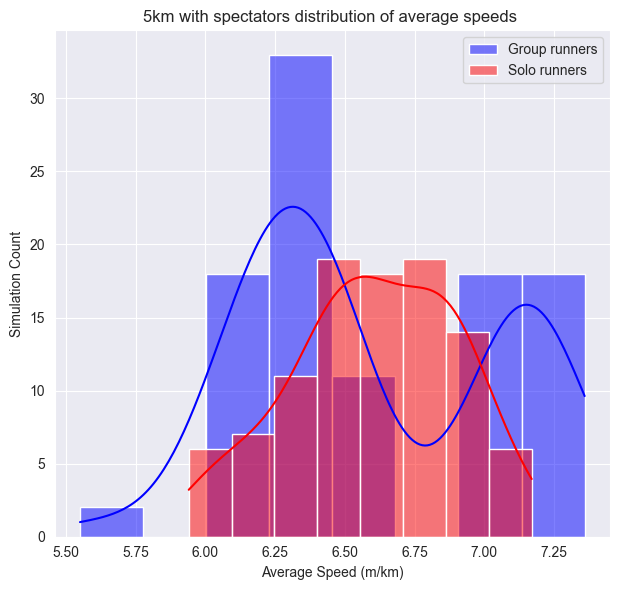

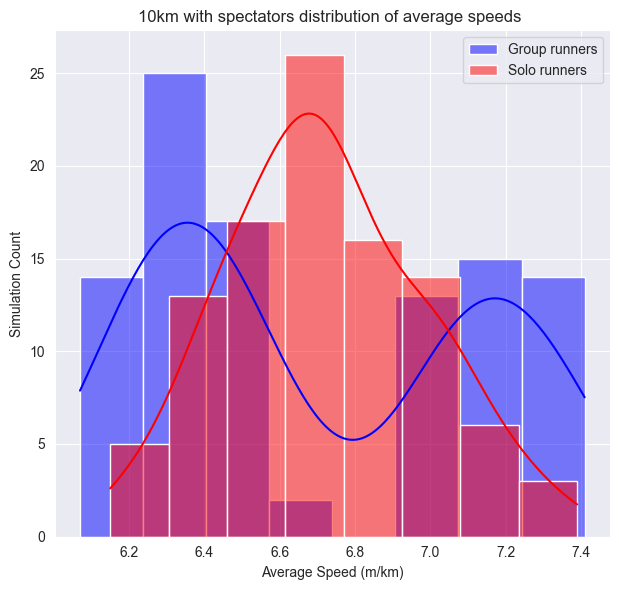

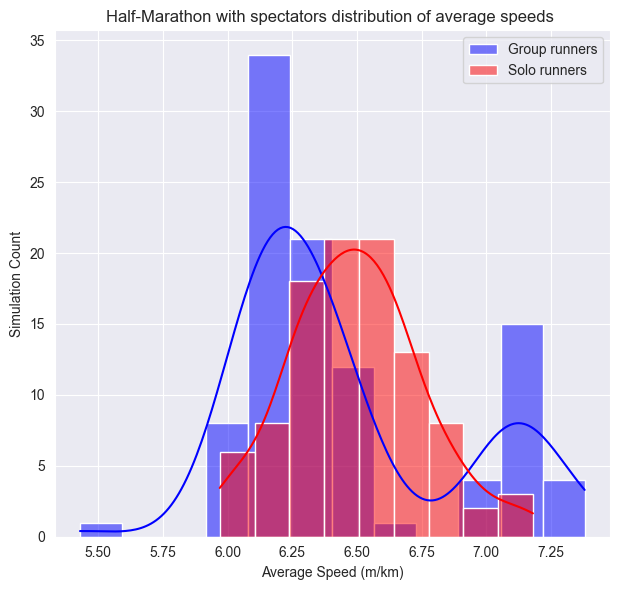

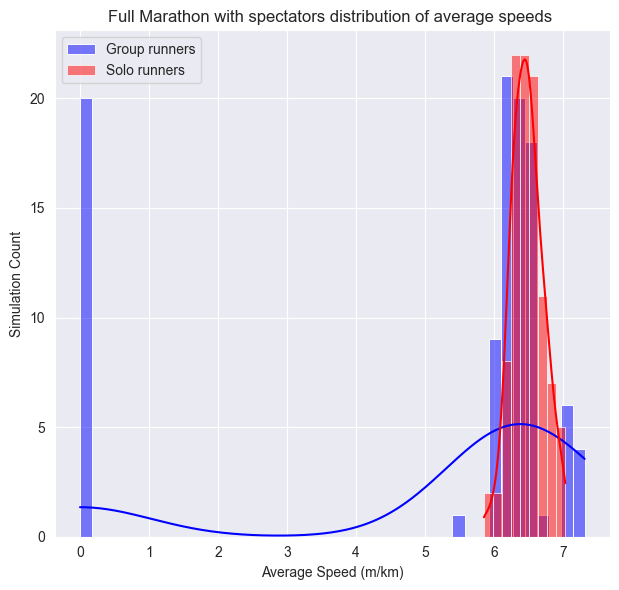

In [50]:
speed_comparison(data_5km, "5km with spectators distribution of average speeds ")
speed_comparison(data_10km, "10km with spectators distribution of average speeds ")
speed_comparison(data_21km, "Half-Marathon with spectators distribution of average speeds ")
speed_comparison(data_42_2km, "Full Marathon with spectators distribution of average speeds ")



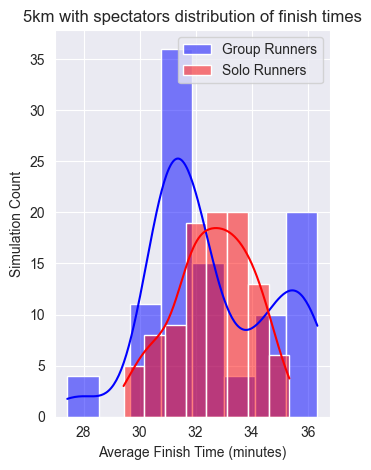

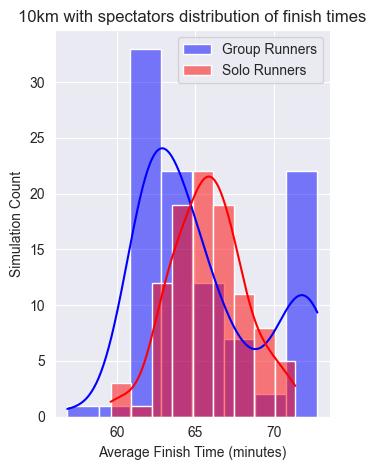

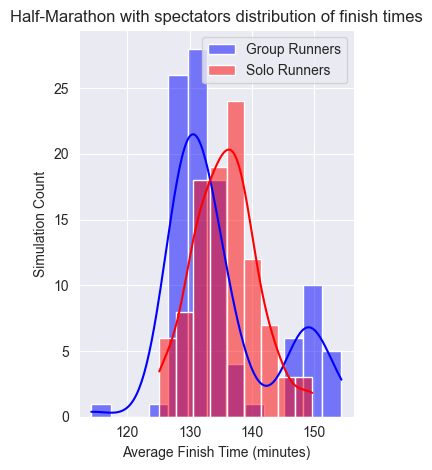

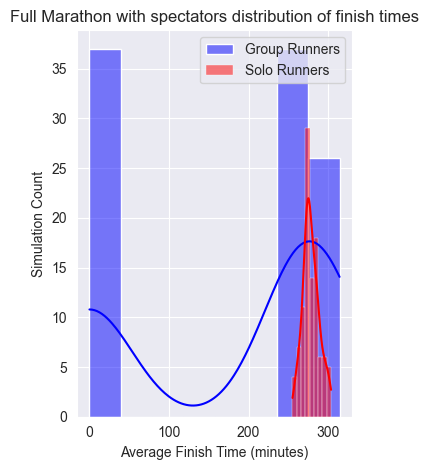

In [37]:
finish_time_comparison(data_5km, "5km with spectators distribution of finish times")
finish_time_comparison(data_10km, "10km with spectators distribution of finish times")
finish_time_comparison(data_21km, "Half-Marathon with spectators distribution of finish times")
finish_time_comparison(data_42_2km, "Full Marathon with spectators distribution of finish times")



Maintenance of Group 

In [51]:
def keeping_group_in_tact(data):
    avg_group_runners_end = data["total-runners-in-group"].mean()
    avg_solo_runners_end = data["total-solo-runners"].mean()
    
    group_intact_count = data[data['total-runners-in-group'] >= 5].shape[0]
    proportion_group_intact = group_intact_count / data.shape[0]
    
    return avg_group_runners_end, avg_solo_runners_end, proportion_group_intact



In [41]:
stats_5km = keeping_group_in_tact(data_5km)
stats_10km = keeping_group_in_tact(data_10km)
stats_21km =  keeping_group_in_tact(data_21km)
stats_42_2km = keeping_group_in_tact(data_42_2km)

stats_5km, stats_10km, stats_21km, stats_42_2km

((8.59, 11.41, 1.0),
 (7.05, 12.94, 0.89),
 (5.22, 14.76, 0.64),
 (1.83, 18.17, 0.11))

Social Susceptibility Effects

In [7]:

def socially_susceptible_speed_comparison(data, event_name):
    # Speed comparision
    #filtered_data = data[data['total-socially-suspectible-runners-in-group'] != 0]
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(data, x='socially-suspectible-group-runners-avg-speed', color='blue', kde=True, label='Socially Susceptible Group runners')
    sns.histplot(data, x='socially-suspectible-solo-runners-avg-speed', color='red', kde=True, label=' Socially Susceptible Solo runners')
    plt.title(event_name)
    plt.xlabel("Average Speed (m/km)")
    plt.ylabel("Simulation Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [8]:
def socially_susceptible_finish_time(data, event_name):
    #filtered_data = data[data['total-socially-suspectible-runners-in-group'] != 0]
    plt.subplot(1, 2, 2)
    sns.histplot(data, x='socially-suspectible-group-runners-avg-finish-time', color='blue', kde=True, label='Socially SusceptibleGroup Runners')
    sns.histplot(data, x='socially-suspectible-solo-runners-avg-finish-time', color='red', kde=True, label='Socially Susceptible Solo Runners')
    plt.title(event_name)
    plt.legend()
    plt.xlabel('Average Finish Time (minutes)')
    plt.ylabel('Simulation Count')
    plt.tight_layout()
    plt.show()

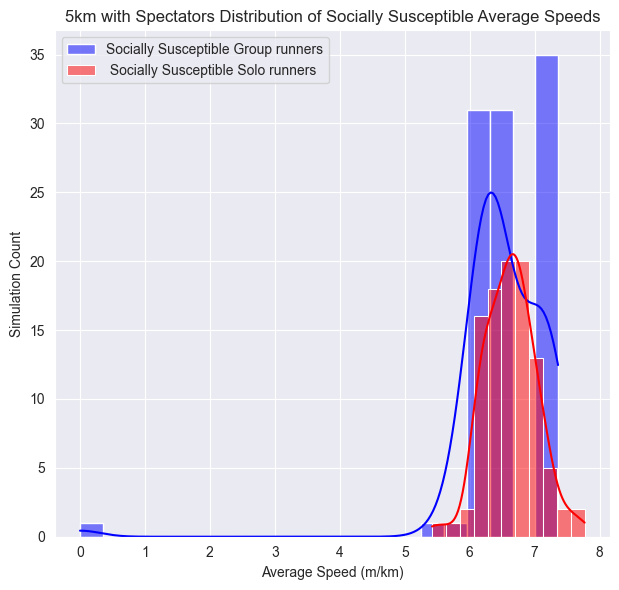

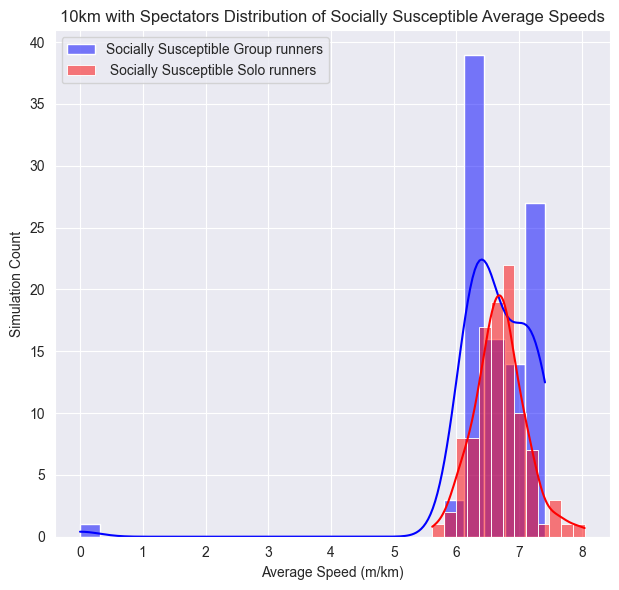

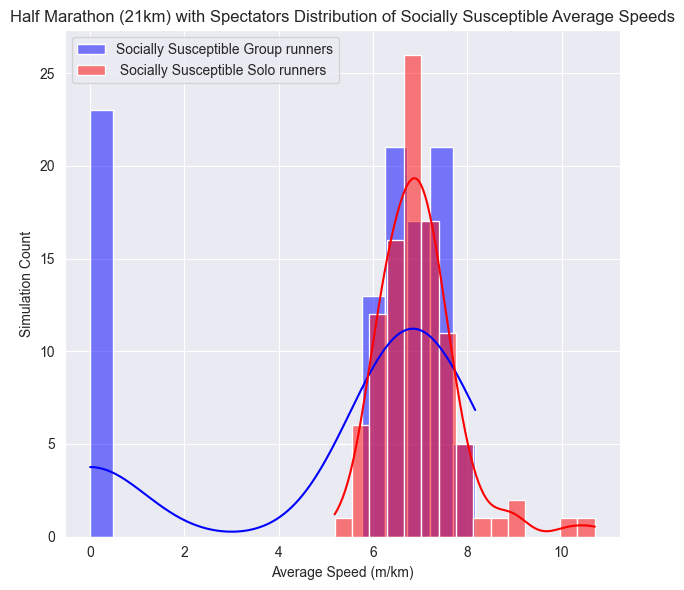

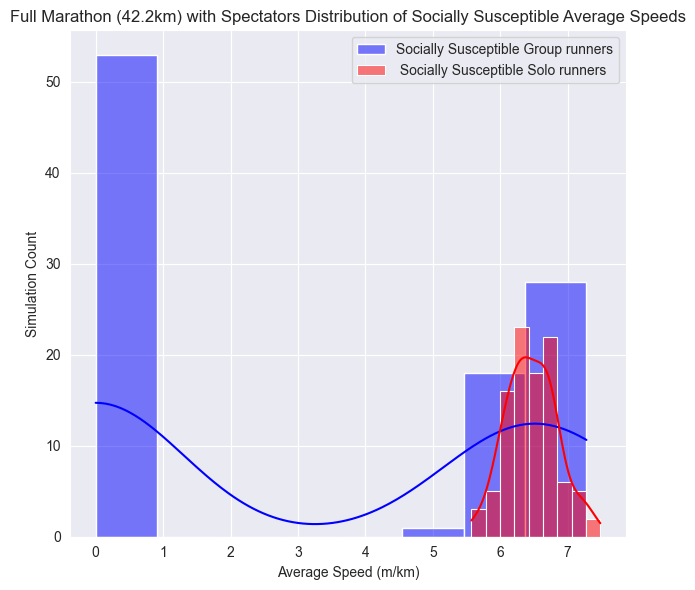

In [9]:
socially_susceptible_speed_comparison(data_5km, '5km with Spectators Distribution of Socially Susceptible Average Speeds')
socially_susceptible_speed_comparison(data_10km, '10km with Spectators Distribution of Socially Susceptible Average Speeds')
socially_susceptible_speed_comparison(data_21km, 'Half Marathon (21km) with Spectators Distribution of Socially Susceptible Average Speeds')
socially_susceptible_speed_comparison(data_42_2km, 'Full Marathon (42.2km) with Spectators Distribution of Socially Susceptible Average Speeds')


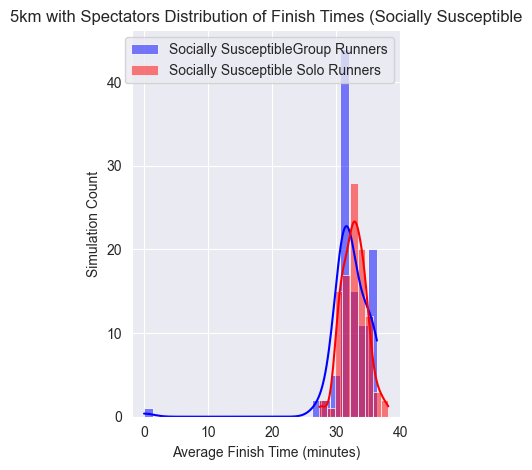

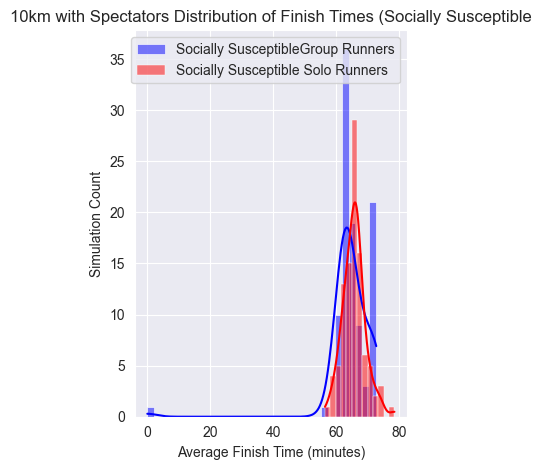

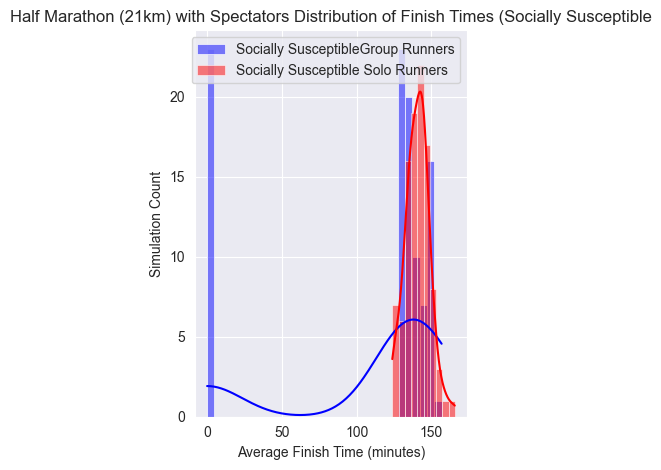

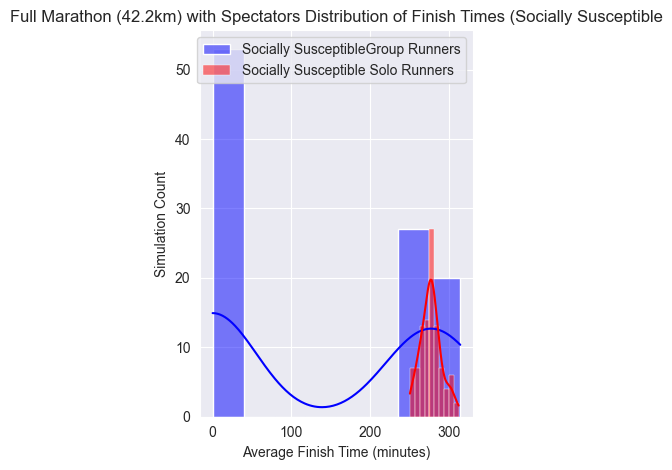

In [10]:
socially_susceptible_finish_time(data_5km, '5km with Spectators Distribution of Finish Times (Socially Susceptible')
socially_susceptible_finish_time(data_10km, '10km with Spectators Distribution of Finish Times (Socially Susceptible')
socially_susceptible_finish_time(data_21km, 'Half Marathon (21km) with Spectators Distribution of Finish Times (Socially Susceptible')
socially_susceptible_finish_time(data_42_2km, 'Full Marathon (42.2km) with Spectators Distribution of Finish Times (Socially Susceptible')


In [12]:
def ss_correlation(data):
    correlation_group = data[['total-socially-suspectible-runners-in-group', 'avg-group-runners-speed','avg-group-runners-finish-time']].corr()
    correlation_solo = data[['total-solo-socially-suspectible-runners', 'avg-solo-runner-speed', 'avg-solo-runner-finish-time']].corr()
    return correlation_group, correlation_solo

In [13]:
ss_correlation_5 = ss_correlation(data_5km)
ss_correlation_10 = ss_correlation(data_10km)
ss_correlation_21 = ss_correlation(data_21km)
ss_correlation_42_2 = ss_correlation(data_42_2km)

ss_correlation_5, ss_correlation_10, ss_correlation_21, ss_correlation_42_2

((                                             total-socially-suspectible-runners-in-group  \
  total-socially-suspectible-runners-in-group                                     1.000000   
  avg-group-runners-speed                                                        -0.068549   
  avg-group-runners-finish-time                                                  -0.091841   
  
                                               avg-group-runners-speed  \
  total-socially-suspectible-runners-in-group                -0.068549   
  avg-group-runners-speed                                     1.000000   
  avg-group-runners-finish-time                               0.958221   
  
                                               avg-group-runners-finish-time  
  total-socially-suspectible-runners-in-group                      -0.091841  
  avg-group-runners-speed                                           0.958221  
  avg-group-runners-finish-time                                     1.000000  ,
     

T-Tests (10km)

In [15]:
def t_tests(data):
    standard_group_speeds = data['avg-group-runners-speed']  # Replace with your actual column name
    standard_solo_speeds = data['avg-solo-runner-speed']     # Replace with your actual column name
    ss_group_speeds = data['socially-suspectible-group-runners-avg-speed']     # Replace with your actual column name
    ss_solo_speeds = data['socially-suspectible-solo-runners-avg-speed']        # Replace with your actual column name
    
    standard_group_times = data['avg-group-runners-finish-time']  # Replace with your actual column name
    standard_solo_times = data['avg-solo-runner-finish-time']     # Replace with your actual column name
    ss_group_times = data['socially-suspectible-group-runners-avg-finish-time']     # Replace with your actual column name
    ss_solo_times = data['socially-suspectible-solo-runners-avg-finish-time']        # Replace with your actual column name
    
    
    # Perform t-tests
    # Average Speed t-test between standard group and solo runners
    ttest_speed_standard = stats.ttest_ind(standard_group_speeds, standard_solo_speeds, equal_var=False)
    
    # Finish Time t-test between standard group and solo runners
    ttest_time_standard = stats.ttest_ind(standard_group_times, standard_solo_times, equal_var=False)
    
    
    # Average Speed t-test between socially susceptible group and solo runners
    ttest_speed_ss = stats.ttest_ind(ss_group_speeds, ss_solo_speeds, equal_var=False)
    
    # Finish Time t-test between socially susceptible group and solo runners
    ttest_time_ss = stats.ttest_ind(ss_group_times, ss_solo_times, equal_var=False)
    results = {
        "Test": ["Average Speed", "Average Finish Time", "Socially Susceptible Average Speed", "Socially Susceptible Finish Time"],
        "Statistics": [ttest_speed_standard[0], ttest_time_standard[0], ttest_speed_ss[0], ttest_time_ss[0]],
        "P-Value": [ttest_speed_standard[1], ttest_time_standard[1], ttest_speed_ss[1], ttest_time_ss[1]],
        #"Degrees of Freedom": [ttest_speed_standard[2], ttest_time_standard[2], ttest_speed_ss[2], ttest_time_ss[2]]
    }
    return pd.DataFrame(results)


In [16]:
t_test_5km = t_tests(data_5km)
t_test_10km = t_tests(data_10km)
t_test_21km = t_tests(data_21km)
t_test_42_2km = t_tests(data_42_2km)

t_test_5km, t_test_10km, t_test_21km, t_test_42_2km

(                                 Test  Statistics   P-Value
 0                       Average Speed   -0.119998  0.904626
 1                 Average Finish Time   -0.325621  0.745112
 2  Socially Susceptible Average Speed   -1.091874  0.276690
 3    Socially Susceptible Finish Time   -1.320493  0.188755,
                                  Test  Statistics   P-Value
 0                       Average Speed   -0.371887  0.710460
 1                 Average Finish Time   -0.766384  0.444568
 2  Socially Susceptible Average Speed   -0.679867  0.497640
 3    Socially Susceptible Finish Time   -1.137946  0.257075,
                                  Test  Statistics       P-Value
 0                       Average Speed   -4.104612  7.699519e-05
 1                 Average Finish Time   -4.190767  5.913214e-05
 2  Socially Susceptible Average Speed   -5.460455  2.757469e-07
 3    Socially Susceptible Finish Time   -5.741270  9.623728e-08,
                                  Test  Statistics       P-Val